In [51]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import glob
from google.colab import drive
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

#Importing

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
df2=pd.read_csv("C:\\Users\\RedPr\\Downloads\\Fake News Project\\Fake.csv")
df2.shape

(23481, 4)

In [33]:
df3=pd.read_csv("C:\\Users\\RedPr\\Downloads\\Fake News Project\\True.csv")
df3.shape

(21417, 4)

In [34]:
f=[]
t=[]
for i in range(df2.shape[0]):
  f.append(0)

for i in range(df3.shape[0]):
  t.append(1)

df2["report"]=f
df3["report"]=t

df2.head()

,title,text,subject,date,report
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [35]:
df3.head()

,title,text,subject,date,report
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [36]:
df=pd.concat([df2,df3],ignore_index = True)
df.head()

,title,text,subject,date,report
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [37]:
df.shape

(44898, 5)

In [38]:
df.columns

Index(['title', 'text', 'subject', 'date', 'report'], dtype='object')

In [39]:
df.dtypes

title      object
text       object
subject    object
date       object
report      int64
dtype: object

#Checking Null Values

In [40]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
report     0
dtype: int64

In [41]:
df["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [42]:
df["subject"]=df["subject"].replace("politics","politicsNews")

In [43]:
df["subject"].unique()

array(['News', 'politicsNews', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'worldnews'], dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   report   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


#Visualization

Number of fake and true news
0    23481
1    21417
Name: report, dtype: int64


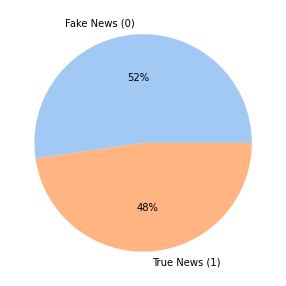

In [ ]:
plt.figure(figsize=(12,5))
month_sold=pd.DataFrame(df["report"].value_counts())
palette_color = sns.color_palette('pastel')
l=["Fake News (0)","True News (1)"]
plt.pie(month_sold,labels=l,colors=palette_color, autopct='%.0f%%')
print("Number of fake and true news")
print(df["report"].value_counts())
plt.show()

Number of news in each subject
politicsNews       18113
worldnews          10145
News                9050
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


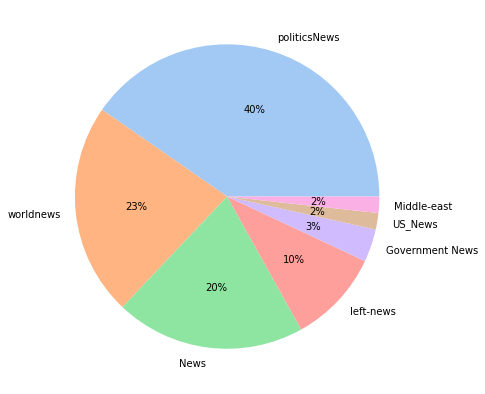

In [ ]:
plt.figure(figsize=(12,7))
a=pd.DataFrame(df["subject"].value_counts())
palette_color = sns.color_palette('pastel')
plt.pie(a,labels=a.index,colors=palette_color, autopct='%.0f%%')
print("Number of news in each subject")
print(df["subject"].value_counts())
plt.show()

In [ ]:
from dateutil import parser
d=[]
for i in df["date"]:
  try:
    date = parser.parse(i, fuzzy=True)
    if str(date)[:4] not in d:
      d.append(str(date)[:4])
  except ValueError:
    continue

In [ ]:
d

['2017', '2016', '2018', '2015']

In [ ]:
y=[]
for i in df["date"]:
  for j in d:
    if j in i:
      y.append(j)
      
yr=pd.DataFrame(y)

Number of news in each year
2017    25904
2016    16470
2015     2485
Name: 0, dtype: int64


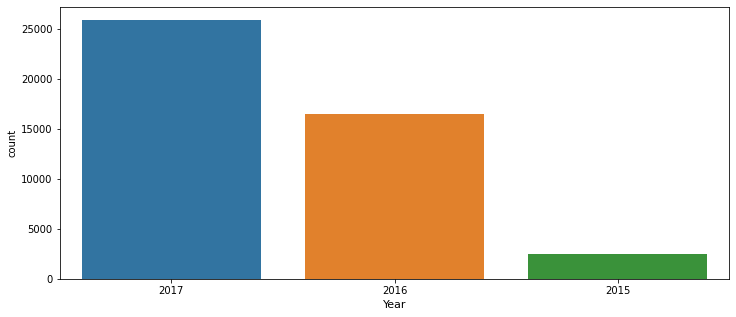

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(yr.iloc[:,0])
plt.xlabel("Year",fontsize=11)
print("Number of news in each year")
print(yr.iloc[:,0].value_counts())

#Data Cleaning

In [45]:
dff=pd.DataFrame()
dff['text'] = df['text'] + " " + df['title']
dff['report'] = df['report']
dff.head()

,text,report
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [46]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_http(text):
    return re.sub(r'http\S+', '', text)

In [47]:
dff['text']=dff['text'].apply(strip_html)

- Extract text between html tags.

In [48]:
df['text'][1153]

'Donald Trump went on a whining rant about the media on Tuesday morning and got totally humiliated.As he usually does, Trump woke up and immediately took to Twitter to attack Democrats, the courts, and the media.He accused Democrats of being obstructionists and once again declared that the Affordable Care Act is in a  death spiral,  a spiral he himself caused by attacking the law through executive orders.Trump also bitched about the 9th Circuit Court blocking his Muslim ban.But he saved most of his vitriol for the media.The Fake News Media has never been so wrong or so dirty. Purposely incorrect stories and phony sources to meet their agenda of hate. Sad!  Donald J. Trump (@realDonaldTrump) June 13, 2017Fake News is at an all time high. Where is their apology to me for all of the incorrect stories???  Donald J. Trump (@realDonaldTrump) June 13, 2017< /script></p> <blockquote class="twitter-tweet" data-lang="en"> <p lang="en" dir="ltr">Heading to the Great State of Wisconsin to talk abo

**- Above is the text before html parsing.**

 **- Below text is after html parsing.**

In [49]:
dff['text'][1153]

'Donald Trump went on a whining rant about the media on Tuesday morning and got totally humiliated.As he usually does, Trump woke up and immediately took to Twitter to attack Democrats, the courts, and the media.He accused Democrats of being obstructionists and once again declared that the Affordable Care Act is in a  death spiral,  a spiral he himself caused by attacking the law through executive orders.Trump also bitched about the 9th Circuit Court blocking his Muslim ban.But he saved most of his vitriol for the media.The Fake News Media has never been so wrong or so dirty. Purposely incorrect stories and phony sources to meet their agenda of hate. Sad!  Donald J. Trump (@realDonaldTrump) June 13, 2017Fake News is at an all time high. Where is their apology to me for all of the incorrect stories???  Donald J. Trump (@realDonaldTrump) June 13, 2017< /script>  Heading to the Great State of Wisconsin to talk about JOBS, JOBS, JOBS! Big progress being made as the Real News is reporting. 

In [52]:
dff['text']=dff['text'].apply(remove_http)
dff["text"] = dff["text"].apply(lambda x: " ".join(x for x in x.split() if '.com' not in x))
dff["text"] = dff["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

- Strip https links from the text.
- Remove link that ends with .com (like pic.twitter.com)
- Convert to lowercase

In [53]:
dff["text"][1153]

'donald trump went on a whining rant about the media on tuesday morning and got totally humiliated.as he usually does, trump woke up and immediately took to twitter to attack democrats, the courts, and the media.he accused democrats of being obstructionists and once again declared that the affordable care act is in a death spiral, a spiral he himself caused by attacking the law through executive orders.trump also bitched about the 9th circuit court blocking his muslim ban.but he saved most of his vitriol for the media.the fake news media has never been so wrong or so dirty. purposely incorrect stories and phony sources to meet their agenda of hate. sad! donald j. trump (@realdonaldtrump) june 13, 2017fake news is at an all time high. where is their apology to me for all of the incorrect stories??? donald j. trump (@realdonaldtrump) june 13, 2017< /script> heading to the great state of wisconsin to talk about jobs, jobs, jobs! big progress being made as the real news is reporting. — don

In [54]:
dff["text"] = dff["text"].str.replace('\d','')
dff["text"] = dff["text"].str.replace('[^\w\s]','')

- Remove numbers
- Remove a character i.e. not a word or whitespace

In [55]:
dff["text"][1153]

'donald trump went on a whining rant about the media on tuesday morning and got totally humiliatedas he usually does trump woke up and immediately took to twitter to attack democrats the courts and the mediahe accused democrats of being obstructionists and once again declared that the affordable care act is in a death spiral a spiral he himself caused by attacking the law through executive orderstrump also bitched about the th circuit court blocking his muslim banbut he saved most of his vitriol for the mediathe fake news media has never been so wrong or so dirty purposely incorrect stories and phony sources to meet their agenda of hate sad donald j trump realdonaldtrump june  fake news is at an all time high where is their apology to me for all of the incorrect stories donald j trump realdonaldtrump june   script heading to the great state of wisconsin to talk about jobs jobs jobs big progress being made as the real news is reporting  donald j trump realdonaldtrump june   yep trump li

In [56]:
from nltk.corpus import stopwords
import re,string
s = set(stopwords.words("english"))
p = list(string.punctuation)
s.update(p)

dff["text"] = dff["text"].apply(lambda x: " ".join(x for x in x.split() if x not in s))

- Remove stop words and punctuation

In [57]:
from textblob import Word
dff["text"] = dff["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

- Lemmatize

In [58]:
dff["text"] = dff["text"].apply(lambda x: ' '.join( [x for x in x.split() if len(x)>1] ))

- Remove any single character if remaining.

In [59]:
df['text'][375]

'Trump made a bad decision, or so his ardent followers seem to think. His attempts to work something out with Congressional Democrats on the Deferred Action for Childhood Arrivals (DACA) program, and also his remarks that current construction on his stupid border wall involves mostly existing fencing, have set off their ire. Big-time and small-time MAGAsh*ts alike are crying today, because their rigid, purist minds suffer from severe tunnel vision that doesn t include Trump doing, well, what he s done. They want Trump to do what he promised and damn the consequences to millions who aren t like them.Take Joe Walsh, for example. Walsh is a former U.S. Representative from Illinois  8th district, but his big claim to fame is being a deadbeat dad. All he wants is for Trump to cut his taxes and build the wall. With Trump s latest tweets on DACA and the wall, though, he s ready to abandon Trump and throw his support to probably someone worse:Trump:  We re close to a deal on amnesty. The wall 

**- Above text is before data cleaning**

**- Below is the same text after data cleaning.**

In [60]:
dff['text'][375]

'trump made bad decision ardent follower seem think attempt work something congressional democrat deferred action childhood arrival daca program also remark current construction stupid border wall involves mostly existing fencing set ire bigtime smalltime magashts alike cry today rigid purist mind suffer severe tunnel vision include trump well done want trump promised damn consequence million like themtake joe walsh example walsh former representative illinois th district big claim fame deadbeat dad want trump cut tax build wall trump latest tweet daca wall though ready abandon trump throw support probably someone worsetrump close deal amnesty wall come later voted joe walsh walshfreedom september art deal right someone remind president elected joe walsh walshfreedom september true trump done joe walsh walshfreedom september voted maga dacapull head mr president joe walsh walshfreedom september ran build wall run fix existing fencing surprising disappointing joe walsh walshfreedom sept

# Post Cleaning Visualization

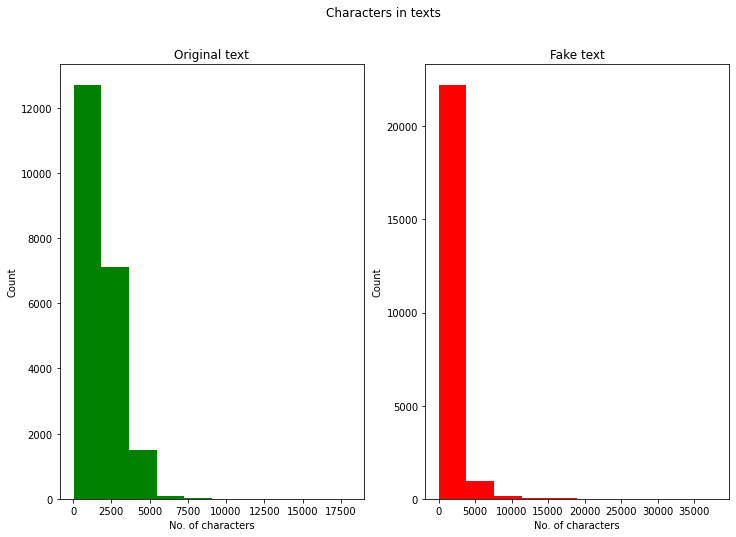

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=dff[dff['report']==1]['text'].str.len()
ax1.set_ylabel("Count")
ax1.set_xlabel("No. of characters")
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=dff[dff['report']==0]['text'].str.len()
ax2.set_xlabel("No. of characters")
ax2.set_ylabel("Count")
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

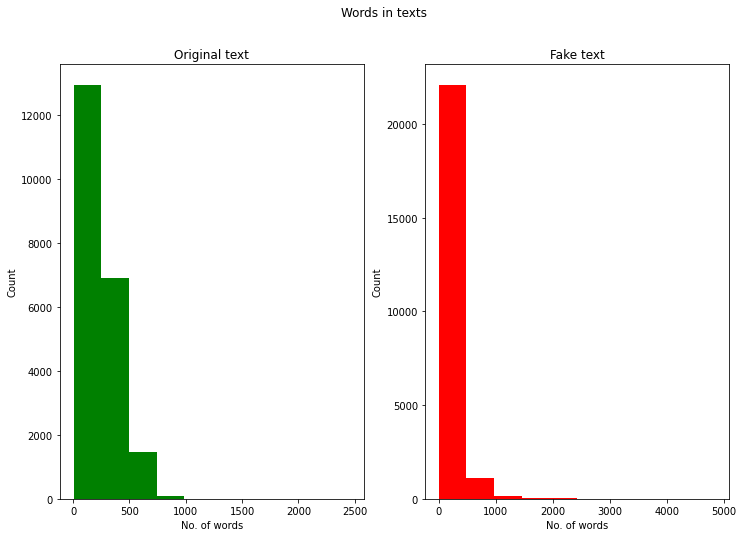

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=dff[dff['report']==1]['text'].str.split().map(lambda x: len(x))
ax1.set_ylabel("Count")
ax1.set_xlabel("No. of words")
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=dff[dff['report']==0]['text'].str.split().map(lambda x: len(x))
ax2.set_ylabel("Count")
ax2.set_xlabel("No. of words")
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

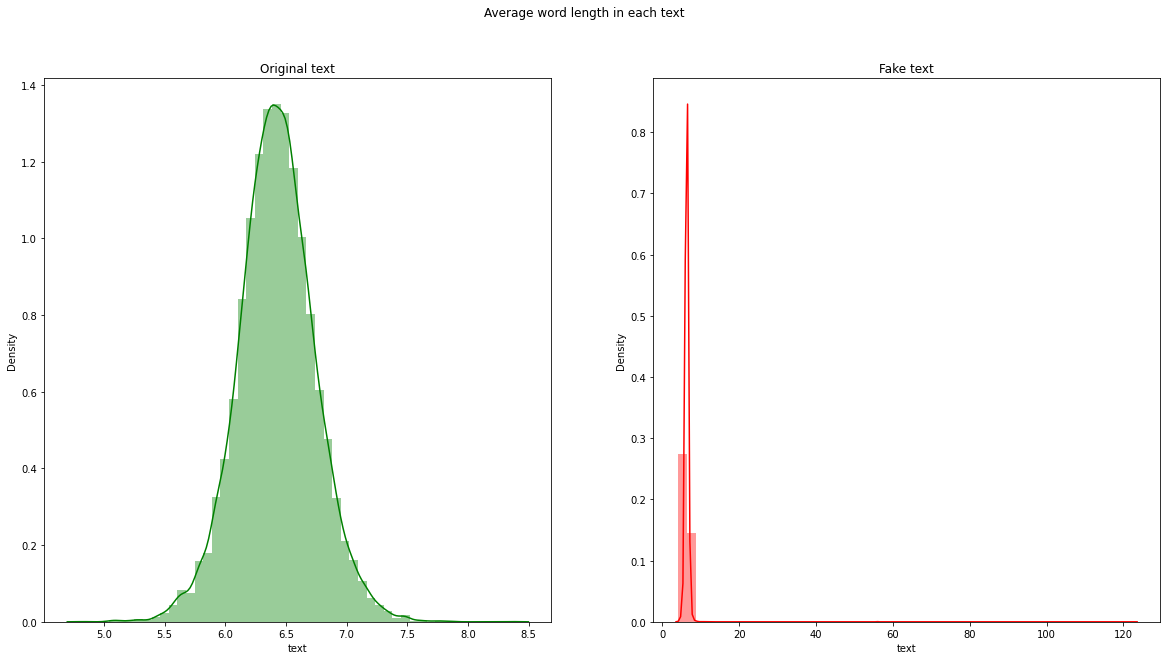

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=dff[dff['report']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Original text')
word=dff[dff['report']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [ ]:
from collections import Counter
corpus = []
for i in dff.text:
    for j in i.split():
        corpus.append(j.strip())

counter = Counter(corpus)
common_words = counter.most_common(10)
dict(common_words)

{'trump': 142724,
 'said': 130261,
 'state': 59775,
 'would': 55429,
 'president': 54772,
 'people': 41987,
 'republican': 39984,
 'one': 37507,
 'year': 35053,
 'new': 32710}

In [ ]:
unigram=(pd.Series(nltk.ngrams(corpus, 1)).value_counts())
unigram

(trump,)           142724
(said,)            130261
(state,)            59775
(would,)            55429
(president,)        54772
                    ...  
(lawlogan,)             1
(antisex,)              1
(prisonstate,)          1
(sexin,)                1
(perdangangan,)         1
Length: 197702, dtype: int64

In [ ]:
bigram=(pd.Series(nltk.ngrams(corpus, 2)).value_counts())
bigram

(donald, trump)             26330
(united, state)             18446
(white, house)              15812
(hillary, clinton)           9659
(new, york)                  8865
                            ...  
(might, compromised)            1
(ambassador, might)             1
(year, yates)                   1
(conversation, reported)        1
(worth, russian)                1
Length: 3749602, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    print(vec.vocabulary_)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

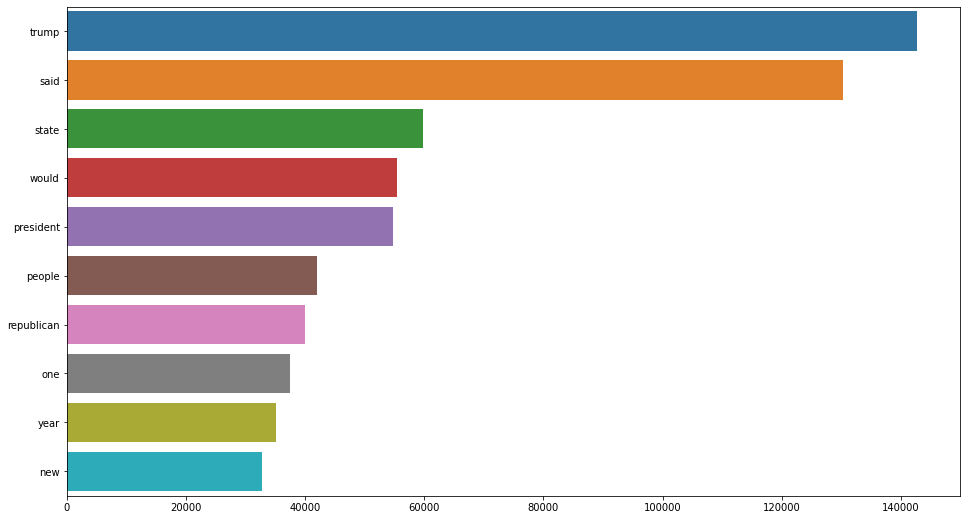

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(dff.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

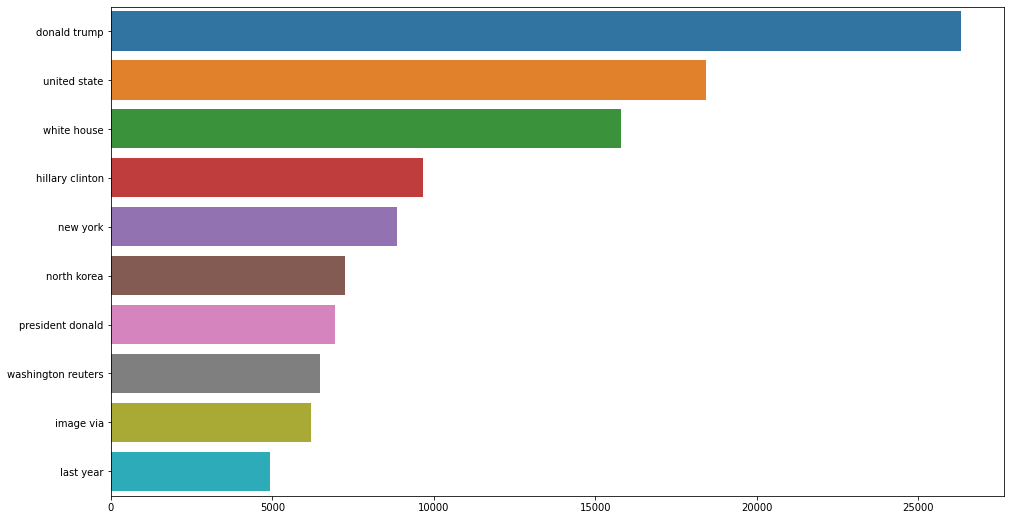

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(dff.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



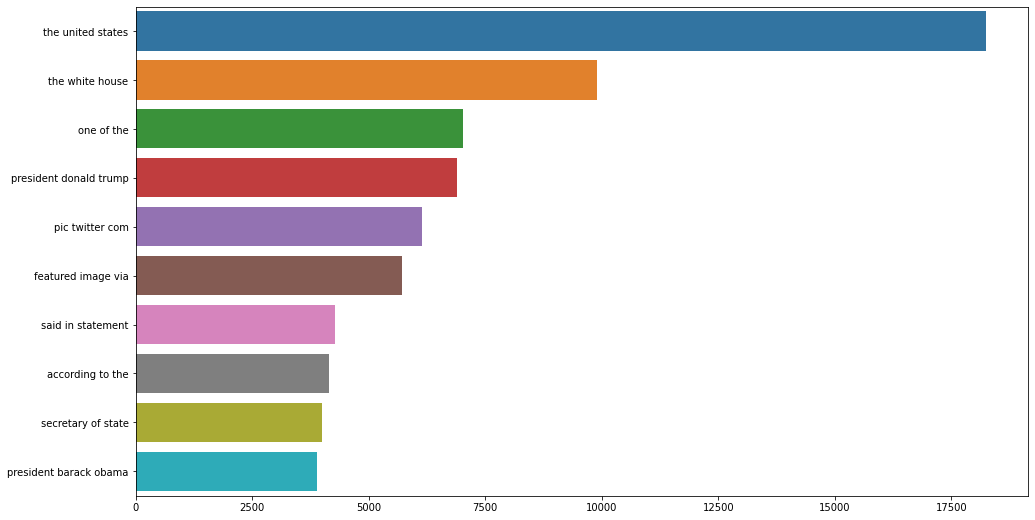

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

#Separating Input and target features

In [61]:
x=dff["text"]
x.head()

0    donald trump wish american happy new year leav...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: text, dtype: object

In [62]:
y=dff["report"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: report, dtype: int64

#Vectorize

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = CountVectorizer()
vect.fit_transform(x)

freq_term_matrix = vect.transform(x)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

# Training and Testing

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report,auc,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
lg = LogisticRegression()

In [88]:
x_train,x_test,y_train,y_test=train_test_split(tf_idf_matrix,y,test_size=0.2,random_state=42)
lg.fit(tf_idf_matrix,y)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
print("Train Accuracy : ",round(accuracy_score(y_train,pred_train)*100,2))
print("Test Accuracy : ",round(accuracy_score(y_test,pred_test)*100,2))
cv_score=cross_val_score(lg,X,y,cv=5)
print("cv score : ", round(cv_score.mean()*100,2))

Train Accuracy :  99.35
Test Accuracy :  99.29
cv score :  99.35


In [89]:
print("Classification Report:\n",classification_report(y_test,pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [90]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix\n",confusion_matrix(y_test,pred_test))

Confusion Matrix
 [[4698   35]
 [  29 4218]]


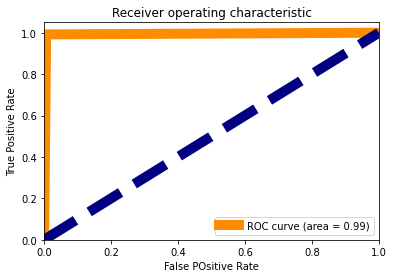

In [91]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()
    

#Model Selection

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    cv_score=cross_val_score(algorithm_instance,X,y,cv=5)
    print("cv score : ", round(cv_score.mean()*100,2))
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   
    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


#KNeighbors Classifier

Accuracy of training model : 84.42
Accuracy of test data : 79.21
cv score :  74.24

Classification report for test data
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      4733
           1       0.79      0.76      0.78      4247

    accuracy                           0.79      8980
   macro avg       0.79      0.79      0.79      8980
weighted avg       0.79      0.79      0.79      8980

Classification report for training data
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     18748
           1       0.85      0.82      0.83     17170

    accuracy                           0.84     35918
   macro avg       0.84      0.84      0.84     35918
weighted avg       0.84      0.84      0.84     35918

Confusion Matrix
 [[3889  844]
 [1023 3224]]




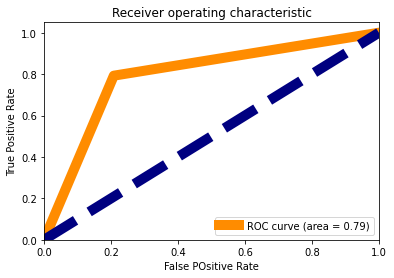

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVC Model

Accuracy of training model : 99.88
Accuracy of test data : 99.41
cv score :  99.04

Classification report for test data
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18748
           1       1.00      1.00      1.00     17170

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

Confusion Matrix
 [[4709   24]
 [  29 4218]]




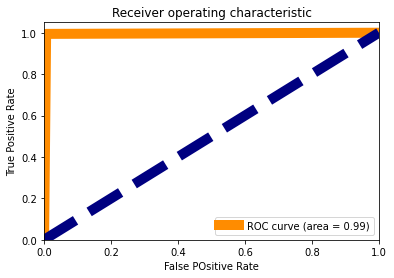

In [ ]:
from sklearn import svm
s=svm.SVC()
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 100.0
Accuracy of test data : 99.77
cv score :  99.48

Classification report for test data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18748
           1       1.00      1.00      1.00     17170

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

Confusion Matrix
 [[4720   13]
 [   8 4239]]




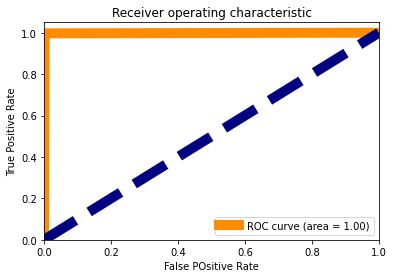

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'n_estimators':range(0,100,50)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': None, 'n_estimators': 50}


Accuracy of training model : 99.99
Accuracy of test data : 99.79
cv score :  99.59

Classification report for test data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18748
           1       1.00      1.00      1.00     17170

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

Confusion Matrix
 [[4719   14]
 [   5 4242]]




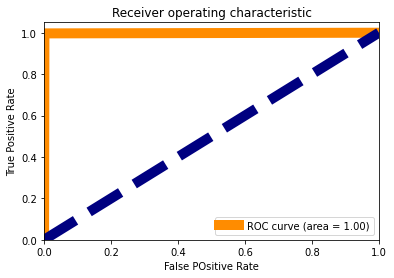

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, class_weight= 'balanced',criterion='entropy', max_features= None)
model_selection(rf,x_train,y_train,x_test,y_test)

# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,50)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'auto', 'n_estimators': 50}


Accuracy of training model : 99.53
Accuracy of test data : 99.53
cv score :  99.35

Classification report for test data
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18748
           1       0.99      1.00      1.00     17170

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

Confusion Matrix
 [[4694   39]
 [   3 4244]]




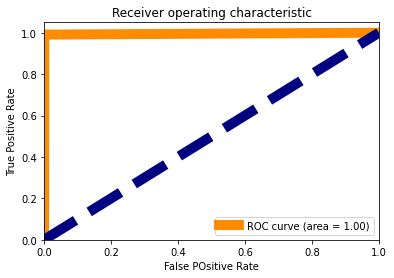

In [ ]:
rf3=GradientBoostingClassifier(criterion='friedman_mse', loss='deviance', max_features= 'auto', n_estimators= 50)
model_selection(rf3,x_train,y_train,x_test,y_test)

# Model Saving

In [77]:
import pickle
filename='rfz.pk1'
pickle.dump(lg,open(filename,'wb'))

We selected Logistic Regression model since
- it has best cross validation score among all the model and high accuracy.
- it has highest auc score of 1.0

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Accuracy: ",result*100)

Model Accuracy:  99.78841870824053


#Conclusion

-	In this study we found that randomforest classifier performs slightly better than logistic regression and rest of the algorithm tested.